In [93]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import bcrypt


In [94]:
#Pie Chart to show Expense summary in percentage

def expense_visualization(userId):
    connector = sqlite3.connect('expense_database.db')
    cursor = connector.cursor()

    cursor.execute('''SELECT amount, category FROM expenses WHERE userId = ?''',(userId,))
    expenses_data = cursor.fetchall()

    if expenses_data:
        amount = [row[0] for row in expenses_data]
        category = [row[1] for row in expenses_data]
        # expenses_df = pd.DataFrame(expenses, columns = ['amount', 'category'])
        plt.figure(figsize=(5, 5))
        plt.pie(amount, labels = category, autopct='%1.1f%%', startangle=120)
        plt.title("Expense Breakdown\n")
        plt.axis('equal')
        plt.show()
    else:
        print("Expenses Unavailable")

In [95]:
#Bar Chart to compare income & expenses


def expenses_income_visualization(userId):
    connector = sqlite3.connect('expense_database.db')
    cursor = connector.cursor()

    cursor.execute('''SELECT SUM(amount) FROM expenses WHERE userId = ?''',(userId,))
    expenses_data = cursor.fetchone()
    cursor.execute('''SELECT amount FROM income WHERE userId = ?''',(userId,))
    income_data = cursor.fetchone()

    if income_data or expenses_data:
        income_df = income_data[0]
        expenses_df = expenses_data[0]
        
        labels = ['Income', "Expenses"]
        values = [income_df, expenses_df]

        plt.figure(figsize=(8,6))
        plt.bar(labels, values, color = ['blue', 'yellow'])
        plt.title("Income Vs Expenses Chart\n")
        plt.ylabel('Amounts')
        plt.show()
    else:
        ("No available Income or Expense")


In [96]:
#Bar Chart to compare income & savings


def savings_income_visualization(userId):
    connector = sqlite3.connect('expense_database.db')
    cursor = connector.cursor()

    cursor.execute('''SELECT amount FROM savings WHERE userId = ?''',(userId,))
    savings_data = cursor.fetchone()
    cursor.execute('''SELECT amount FROM income WHERE userId = ?''',(userId,))
    income_data = cursor.fetchone()

    if income_data or savings_data:
        income_df = income_data[0]
        savings_df = savings_data[0]
        
        labels = ['Income', "Expenses"]
        values = [income_df, savings_df]

        plt.figure(figsize=(8,6))
        plt.bar(labels, values, color = ['purple', 'red'])
        plt.title("Income Vs Savings Chart\n")
        plt.ylabel('Amounts')
        plt.show()
    else:
        ("No available Income or Savings")

In [97]:
#Bar Chart to show each expense category


def expenses_category_visualization(userId):
    connector = sqlite3.connect('expense_database.db')
    cursor = connector.cursor()

    cursor.execute('''SELECT amount, category FROM expenses WHERE userId = ?''',(userId,))
    expenses_data = cursor.fetchall()

    if expenses_data:
        amount = [row[0] for row in expenses_data]
        category = [row[1] for row in expenses_data]

        plt.figure(figsize=(7,5))
        plt.bar(category, amount, color = 'pink')
        plt.title("Expense Category Chart\n")
        plt.xlabel("Category")
        plt.ylabel('Amounts')
        plt.xticks(rotation=45, ha='left')
        plt.tight_layout()
        plt.show()
    else:
        ("No available expense")

In [98]:
#Users get to visualize their Data here in Charts
def user_login():
    username = input("USERNAME: ")
    password = input("PASSWORD: ")

    connector = sqlite3.connect("expense_database.db")
    cursor = connector.cursor()

    cursor.execute('''SELECT password_hash FROM users WHERE username=?''', (username,))
    res = cursor.fetchone()

    if res:
        password_hash = res[0]
        if bcrypt.checkpw(password.encode('utf-8'), password_hash):
            print(f"Welcome {username}!")
            cursor.execute('''SELECT id FROM users WHERE username = ?''', (username,))
            userId = cursor.fetchone()[0]
            connector.close()
            return userId
        else:
            print("Incorrect Password!")
            return None

    else:
        print("Username does not exist")
        return None

Login--- 
Welcome mercy!
Insights: 
1. Expense Chart
2. Income and Expense Comparison
3. Income and Savings Comparison
4. Expense Category
5. Logout


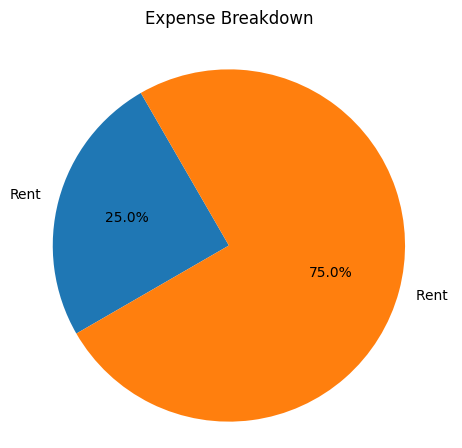

Insights: 
1. Expense Chart
2. Income and Expense Comparison
3. Income and Savings Comparison
4. Expense Category
5. Logout


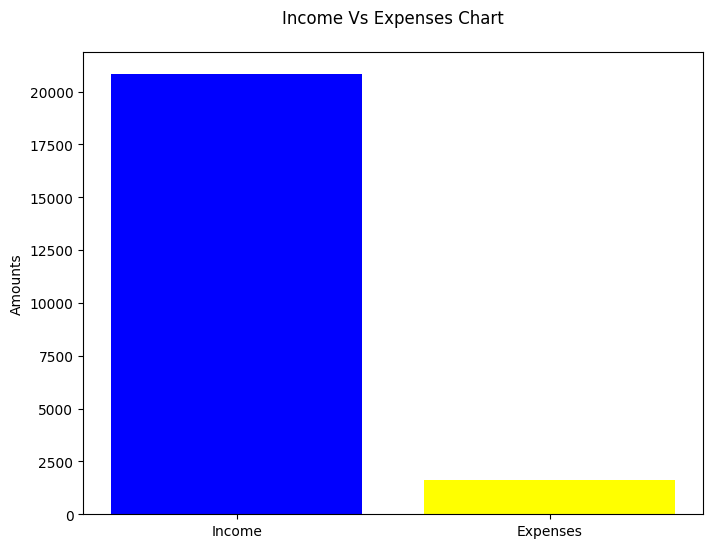

Insights: 
1. Expense Chart
2. Income and Expense Comparison
3. Income and Savings Comparison
4. Expense Category
5. Logout


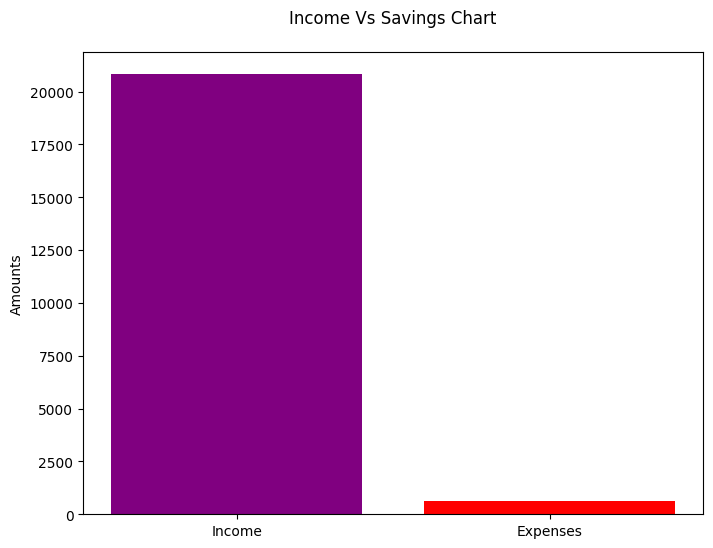

Insights: 
1. Expense Chart
2. Income and Expense Comparison
3. Income and Savings Comparison
4. Expense Category
5. Logout


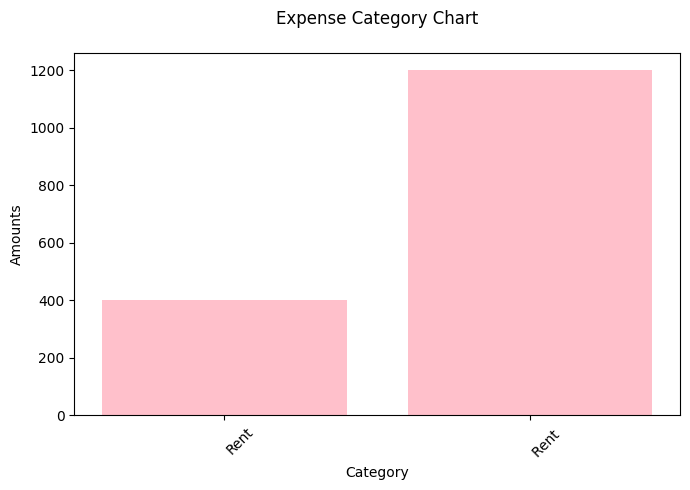

Insights: 
1. Expense Chart
2. Income and Expense Comparison
3. Income and Savings Comparison
4. Expense Category
5. Logout
Invalid Option
Insights: 
1. Expense Chart
2. Income and Expense Comparison
3. Income and Savings Comparison
4. Expense Category
5. Logout
Logged out


In [99]:
print("Login--- ")
userId = user_login()
while True:
    print("Insights: ")
    print("1. Expense Chart")
    print("2. Income and Expense Comparison") 
    print("3. Income and Savings Comparison")
    print("4. Expense Category")
    print("5. Logout")
    choice = input("OPTION: ")

    if choice == "1": expense_visualization(userId)
    elif choice == "2": expenses_income_visualization(userId)
    elif choice == "3": savings_income_visualization(userId)
    elif choice == "4": expenses_category_visualization(userId)
    elif choice == "5": 
        print("Logged out")
        break
    else: print("Invalid Option") 